In [52]:
import os
import glob
import pickle
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [7]:
def onetoughjar(path2dic):
    with open(path2dic, 'rb') as pickle_file:
        try:
            while True:
                output = pickle.load(pickle_file)
        except EOFError:
            pass
    return(output)

In [13]:
savedDict = onetoughjar('/Users/gracer/Library/CloudStorage/OneDrive-UniversityofWyoming/0. Lab/M2AENAD Lab - Documents/RESEARCH/ABCD/Yana_SSIB_2024/tmp/SSBABCDanalysis_11-23-2024_07-36-16')

In [14]:
savedDict.keys()

dict_keys(['df', 'X', 'y', 'X_train', 'X_test', 'y_train', 'y_test', 'best_pipeline', 'X_reg', 'X_trainReg', 'X_testReg', 'y_trainReg', 'y_testReg', 'logistic'])

In [34]:
df = savedDict['X']

In [35]:
df = df.join(savedDict['y'])

In [36]:
df.shape

(3700, 421)

In [38]:
# Subset rows where ssb_group == 1
subset_df_high = df[df['ssb_group'] == 1]

# Subset rows where ssb_group == 0
subset_df_low = df[df['ssb_group'] == 0]


In [40]:
subset_df_low.shape

(1850, 421)

In [41]:
subset_df_high.shape

(1850, 421)

In [20]:
brain = ['rsfmri_c_ngd_ad_ngd_cgc', 'rsfmri_c_ngd_ad_ngd_vs',
       'rsfmri_c_ngd_cgc_ngd_cgc', 'rsfmri_c_ngd_smh_ngd_smm',
       'rsfmri_c_ngd_sa_ngd_vta', 'rsfmri_cor_ngd_au_scs_aalh',
       'rsfmri_cor_ngd_au_scs_ptrh', 'rsfmri_cor_ngd_au_scs_vtdcrh',
       'rsfmri_cor_ngd_cerc_scs_cdelh', 'rsfmri_cor_ngd_cerc_scs_ptlh',
       'rsfmri_cor_ngd_cerc_scs_aglh', 'rsfmri_cor_ngd_cerc_scs_vtdclh',
       'rsfmri_cor_ngd_cerc_scs_hprh', 'rsfmri_cor_ngd_cerc_scs_agrh',
       'rsfmri_cor_ngd_cerc_scs_vtdcrh', 'rsfmri_cor_ngd_copa_scs_thplh',
       'rsfmri_cor_ngd_copa_scs_vtdclh', 'rsfmri_cor_ngd_copa_scs_plrh',
       'rsfmri_cor_ngd_df_scs_ptlh', 'rsfmri_cor_ngd_df_scs_pllh',
       'rsfmri_cor_ngd_df_scs_aalh', 'rsfmri_cor_ngd_none_scs_ptlh',
       'rsfmri_cor_ngd_none_scs_thprh', 'rsfmri_cor_ngd_none_scs_cderh',
       'rsfmri_cor_ngd_rst_scs_bs', 'rsfmri_cor_ngd_rst_scs_thprh',
       'rsfmri_cor_ngd_rst_scs_hprh', 'rsfmri_cor_ngd_rst_scs_vtdcrh',
       'rsfmri_cor_ngd_smh_scs_crcxlh', 'rsfmri_cor_ngd_smh_scs_pllh',
       'rsfmri_cor_ngd_smh_scs_cderh', 'rsfmri_cor_ngd_smh_scs_ptrh',
       'rsfmri_cor_ngd_smh_scs_hprh', 'rsfmri_cor_ngd_smh_scs_aarh',
       'rsfmri_cor_ngd_smm_scs_hplh', 'rsfmri_cor_ngd_smm_scs_aglh',
       'rsfmri_cor_ngd_smm_scs_thprh', 'rsfmri_cor_ngd_sa_scs_crcxlh',
       'rsfmri_cor_ngd_sa_scs_thplh', 'rsfmri_cor_ngd_vta_scs_hplh',
       'rsfmri_cor_ngd_vs_scs_hplh', 'rsfmri_cor_ngd_vs_scs_thprh',
       'rsfmri_cor_ngd_vs_scs_plrh', 'rsfmri_cor_ngd_vs_scs_hprh']

In [44]:
def graphList (cols, df):
    edges = []
    for x in cols:
        y = x.split('_')
        ROI1 = y[3]
        ROI2 = y[5]
        ser = (ROI1, ROI2, {"weight": df[x].mean(), "SD":df[x].std()})
        edges.append(ser)
    return(edges)

In [46]:
highEdgeList = graphList(brain, subset_df_high)
lowEdgeList = graphList(brain, subset_df_low)

In [48]:
lowG = nx.Graph()
highG = nx.Graph()


In [50]:
# Add edges to the graph
lowG.add_edges_from(lowEdgeList)
highG.add_edges_from(highEdgeList)


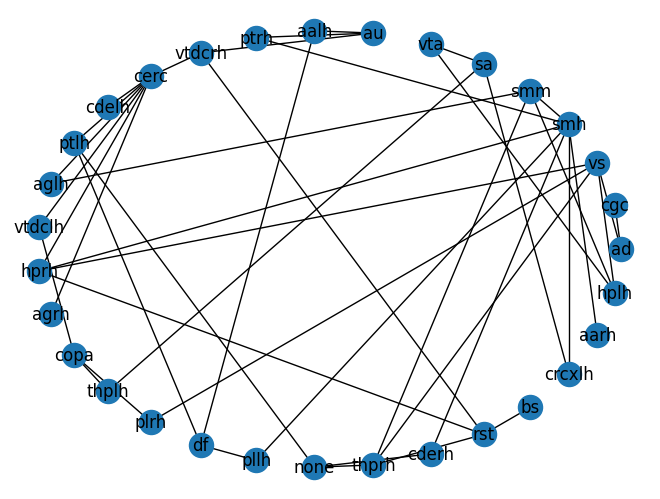

In [56]:
pos = nx.circular_layout(lowG)  # Seed layout for reproducibility
nx.draw(lowG, pos=pos, with_labels=True)
plt.show()

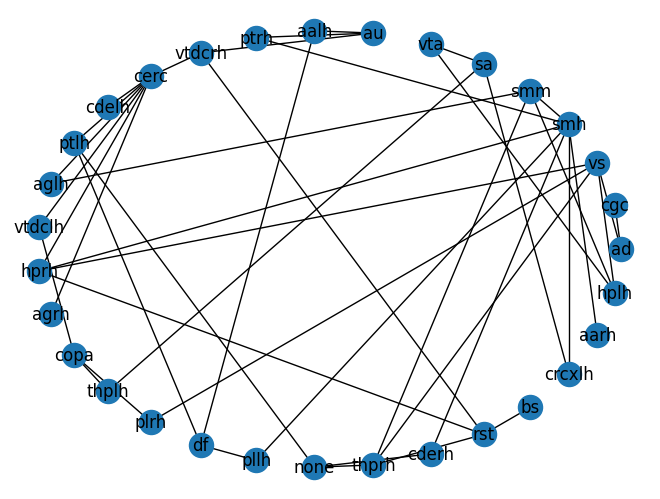

In [57]:
pos = nx.circular_layout(highG)  # Seed layout for reproducibility
nx.draw(highG, pos=pos, with_labels=True)
plt.show()

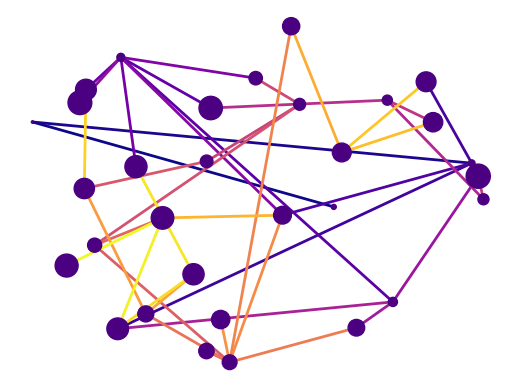

In [63]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx

seed = 13648  # Seed random number generators for reproducibility
G = lowG
pos = nx.spring_layout(G, seed=seed)

node_sizes = [3 + 10 * i for i in range(len(G))]
M = G.number_of_edges()
edge_colors = range(2, M + 2)
edge_alphas = [(5 + i) / (M + 4) for i in range(M)]
cmap = plt.cm.plasma

nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color="indigo")
edges = nx.draw_networkx_edges(
    G,
    pos,
    node_size=node_sizes,
    arrowstyle="->",
    arrowsize=10,
    edge_color=edge_colors,
    edge_cmap=cmap,
    width=2,
)


ax = plt.gca()
ax.set_axis_off()
plt.show()

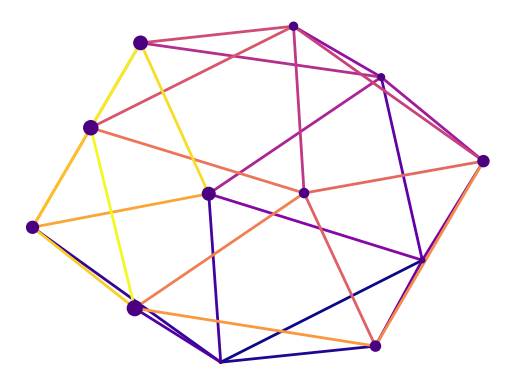

In [66]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import networkx as nx

seed = 13648  # Seed random number generators for reproducibility
G = G
pos = nx.spring_layout(G, seed=seed)

node_sizes = [3 + 10 * i for i in range(len(G))]
M = G.number_of_edges()
edge_colors = range(2, M + 2)
edge_alphas = [(5 + i) / (M + 4) for i in range(M)]
cmap = plt.cm.plasma

nodes = nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color="indigo")
edges = nx.draw_networkx_edges(
    G,
    pos,
    node_size=node_sizes,
    arrowstyle="->",
    arrowsize=10,
    edge_color=edge_colors,
    edge_cmap=cmap,
    width=2,
)


ax = plt.gca()
ax.set_axis_off()
plt.show()

|Feature	|Clique	|Clustering|
|--|--|--|
|Definition	|A complete subgraph|	A measure of triangle density|
|Type	|Subgraph of nodes	|Statistical measure|
|Focus|	Exact complete connectivity	|Tendency to form connections locally|
|Scope	|Local| (specific node groups)|	Local or global graph property|
|Applications|	Finding tightly connected subgroups|	Understanding network structure|

In [65]:
# Platonic icosahedral graph is 5-node-connected
G = nx.icosahedral_graph()
nx.node_connectivity(G)


5